In [3]:
import tensorflow as tf
import tensorflow.keras as keras
import keras.layers as layers

from tqdm import tqdm
import pandas as pd
import numpy as np
import torch

from sklearn.model_selection import train_test_split
from create_data_set import clean_data

# from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D
# from keras.models import Model

2023-07-24 18:00:14.079601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
"""
input_layer = Input(shape=(400, 16))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(32, return_sequences=True)(conv1)
output_layer = Dense(1, activation='sigmoid')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)
"""


model = keras.models.Sequential()

# Add the Conv1D layer
model.add(layers.Conv1D(filters=32,
                 kernel_size=8,
                 strides=1,
                 activation='relu',
                 padding='same',
                 input_shape=(3000, 1)))  # Input shape only needs to be specified for the first layer

# Add the LSTM layer
model.add(layers.LSTM(32, return_sequences=True))

# Add the Dense output layer
model.add(layers.Dense(1, activation='sigmoid'))

loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_function, optimizer='adam')

model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 3000, 32)          288       
                                                                 
 lstm_1 (LSTM)               (None, 3000, 32)          8320      
                                                                 
 dense_1 (Dense)             (None, 3000, 1)           33        
                                                                 
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________


2023-07-24 18:04:51.052529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-24 18:04:51.054336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-24 18:04:51.055712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [9]:
f_name  = f'/home/hadasabraham/SignalCluster/data/datasets/hadas_adir_barak_train.csv'
# create_data_set(f_name, 20, 2, False)
col_names = ['signal', 'barcode']
data = pd.read_csv(f_name, index_col=0)
# data.columns = col_names
X = data['signal']
X = X.apply(eval).apply(np.array)
X = X.apply(lambda x: clean_data(x,3000))
Y = data['barcode']
y_signals = list(Y)
y_signals2 = list(set(y_signals))
# Example names vector (should have 20 names)
class_number = [i for i in range(20)]

seed = 211

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# seprate to test, validation 
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.33, random_state=seed)
print(f"Train size: {x_train.shape[0]}")
print(f"Val size: {x_val.shape[0]}")
print(f"Test size: {x_test.shape[0]}")

Train size: 4172
Val size: 591
Test size: 1197


In [39]:
# # pre-processing and converting labels to integers
# x_train_prep = preprocessing.scale(x_train)
# x_test_prep = preprocessing.scale(x_test)
# x_val_prep = preprocessing.scale(x_val)

# y_train_np = np.array([class_number[y_signals2.index(x)] for x in y_train]).astype(int)
# y_test_np = np.array([class_number[y_signals2.index(x)] for x in y_test]).astype(int)
# y_val_np = np.array([class_number[y_signals2.index(x)] for x in y_val]).astype(int)
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform labels
y_train_np = label_encoder.fit_transform(y_train)
y_test_np = label_encoder.fit_transform(y_test)
y_val_np = label_encoder.fit_transform(y_val)


# Convert the NumPy arrays to torch tensors
x_train_tensor = torch.tensor(np.stack(x_train))
y_train_tensor = torch.tensor(y_train_np, dtype=torch.int64)
# x_val_tensor = torch.tensor(np.stack(x_val))
# y_val_tensor = torch.tensor(y_val_np, dtype=torch.int64)
# x_test_tensor = torch.tensor(np.stack(x_test))
# y_test_tensor = torch.from_numpy(y_test_np, dtype=torch.int64)


In [40]:
# Now, you can use the TensorFlow tensors for training
model.fit(x_train_tensor, y_train_tensor, epochs=200, batch_size=5, verbose=0)

TypeError: Cannot convert the argument `type_value`: torch.int64 to a TensorFlow DType.

In [41]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [42]:
f_name  = f'/home/hadasabraham/SignalCluster/data/datasets/hadas_adir_barak_train.csv'
# create_data_set(f_name, 20, 2, False)
col_names = ['signal', 'barcode']
data = pd.read_csv(f_name, index_col=0)
# data.columns = col_names
X = data['signal']
X = X.apply(eval).apply(np.array)
X = X.apply(lambda x: clean_data(x,3000))
Y = data['barcode']
y_signals = list(Y)
y_signals2 = list(set(y_signals))
# Example names vector (should have 20 names)
class_number = [i for i in range(20)]

seed = 211

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# seprate to test, validation 
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.33, random_state=seed)
print(f"Train size: {x_train.shape[0]}")
print(f"Val size: {x_val.shape[0]}")
print(f"Test size: {x_test.shape[0]}")
y_train_np = np.array([class_number[y_signals2.index(x)] for x in y_train]).astype(np.int)
y_test_np = np.array([class_number[y_signals2.index(x)] for x in y_test]).astype(np.int)
y_val_np = np.array([class_number[y_signals2.index(x)] for x in y_val]).astype(np.int)
# Convert the NumPy arrays to torch tensors
x_train_tensor = torch.tensor(np.stack(x_train))
y_train_tensor = torch.from_numpy(y_train_np)

x_val_tensor = torch.tensor(np.stack(x_val))
y_val_tensor = torch.from_numpy(y_val_np)
x_test_tensor = torch.tensor(np.stack(x_test))
y_test_tensor = torch.from_numpy(y_test_np)



Train size: 4172
Val size: 591
Test size: 1197


/tmp/ipykernel_2984435/1333129117.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train_np = np.array([class_number[y_signals2.index(x)] for x in y_train]).astype(np.int)
/tmp/ipykernel_2984435/1333129117.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release n

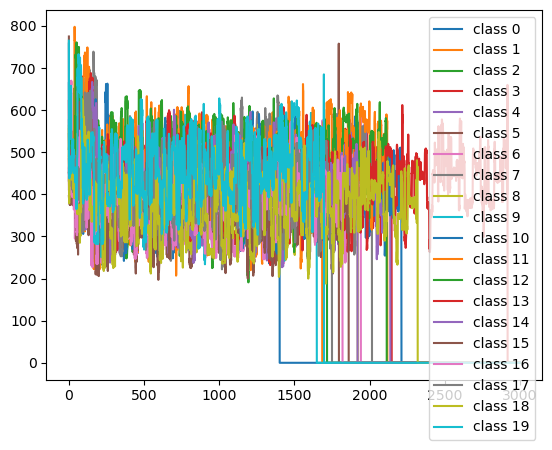

In [46]:
plt.figure()
for c in class_number:
    c_x_train = x_train_tensor[y_train_tensor == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [68]:
# x_train_tensor((x_train.shape[0], x_train.shape[1], 1))
x_train_tensor.reshape((x_train_tensor.shape[0], x_train_tensor.shape[1], 1))
x_test_tensor.reshape((x_test_tensor.shape[0], x_test_tensor.shape[1], 1))
print(x_train_tensor.shape[0])
print(x_train_tensor.shape[1])
print(x_train_tensor.shape[2])
print(type(x_train_tensor))
print(type(y_train_tensor))
x_train_tensor.shape[1:]

4172
3000
1
<class 'torch.Tensor'>
<class 'torch.Tensor'>


torch.Size([3000, 1])

In [80]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=100, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=50, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=50, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)


    output_layer = keras.layers.Dense(20, activation="softmax")(conv3)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train_tensor.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [77]:
x_train_tensor = x_train_tensor.numpy()
y_train_tensor = y_train_tensor.numpy()

x_val_tensor = x_val_tensor.numpy()
y_val_tensor = y_val_tensor.numpy()
x_test_tensor = x_test_tensor.numpy()
y_test_tensor = y_test_tensor.numpy()


In [81]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train_tensor,
    y_train_tensor,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500


2023-07-24 21:18:38.199537: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: logits and labels must have the same first dimension, got logits shape [96000,20] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/traitlets/config/application.py", line 1041, in launch_instance
      app.start()
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 530, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_2984435/4228211408.py", line 18, in <module>
      history = model.fit(
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/hadasabraham/miniconda3/envs/nanopore/lib/python3.9/site-packages/keras/backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [96000,20] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_17799]